In [271]:
import numpy as np
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd

In [272]:
p = Path('./train/Images/')

In [273]:
print(p, type(p))

train/Images <class 'pathlib.PosixPath'>


In [274]:
labels_dict = {
    'Pikachu': 0,
    'Bulbasaur': 1,
    'Charmander': 2
}

In [275]:
df = pd.read_csv('./train/train.csv')

In [276]:
df.head()

,ImageId,NameOfPokemon
0,296.jpg,Pikachu
1,297.jpg,Pikachu
2,298.jpg,Pikachu
3,299.jpg,Pikachu
4,300.jpg,Pikachu


In [277]:
data = df.values

In [278]:
image_data, labels = [], []

In [279]:
m = data.shape[0]

In [280]:
for i in range(m) :
    img_path = './train/Images/' + data[i][0]
    img = image.load_img(img_path, target_size=(30,30))
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    labels.append(labels_dict[data[i][1]])

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [281]:
image_data = np.array(image_data, dtype='float32')/255.0
labels = np.array(labels)

In [282]:
# image_data[:3]

In [283]:
# labels[:10]

In [284]:
print(len(image_data), len(labels))
print(image_data.shape)

304 304
(304, 30, 30, 3)


### Shuffle data

In [285]:
import random

combined = list(zip(image_data, labels))
random.shuffle(combined)

image_data[:], labels[:] = zip(*combined)

In [286]:
image_data = image_data.reshape(m, -1)
print(image_data.shape, labels.shape)

(304, 2700) (304,)


### Feature Selection

In [287]:
from sklearn.feature_selection import SelectKBest, chi2

In [288]:
best_features = SelectKBest(score_func=chi2, k = 1000)

In [289]:
fit = best_features.fit(image_data, labels)

In [290]:
fit.scores_

array([0.88548316, 0.396627  , 0.59394984, ..., 0.45871205, 0.07246403,
       0.47191924])

In [291]:
dfscores = pd.DataFrame(fit.scores_)

In [292]:
dfscores.head()

,0
0,0.885483
1,0.396627
2,0.593950
3,0.927044
4,0.490995


In [293]:
# pd.DataFrame?

In [294]:
scores = fit.scores_

In [295]:
scores.shape

(2700,)

In [296]:
np.argmax(scores)

2121

In [297]:
scores[941]

8.76608348246863

In [298]:
np.arange(0, 2700)

array([   0,    1,    2, ..., 2697, 2698, 2699])

In [299]:
scores_idx = np.hstack((np.arange(0, 2700), scores))

In [300]:
dfscores = pd.DataFrame(scores_idx)

In [301]:
dfscores.tail()

,0
5395,0.100396
5396,0.514377
5397,0.458712
5398,0.072464
5399,0.471919


In [302]:
indices = np.argpartition(scores, -2700)[-500:]

In [303]:
indices.sort()

In [304]:
indices

array([ 111,  114,  117,  204,  213,  291,  294,  297,  300,  303,  306,
        309,  313,  381,  384,  387,  390,  393,  398,  401,  403,  404,
        406,  468,  471,  474,  477,  480,  483,  561,  564,  567,  570,
        573,  579,  609,  650,  651,  653,  654,  656,  657,  659,  660,
        663,  665,  666,  668,  671,  674,  729,  732,  738,  741,  743,
        744,  746,  747,  749,  750,  752,  753,  756,  758,  759,  761,
        764,  766,  767,  771,  822,  828,  831,  833,  834,  836,  837,
        839,  840,  842,  843,  845,  846,  848,  849,  851,  852,  854,
        855,  857,  858,  860,  891,  921,  923,  924,  927,  930,  932,
        933,  935,  936,  938,  939,  940,  941,  942,  944,  945,  947,
        948,  951,  953,  954,  957,  960,  981,  996, 1011, 1014, 1017,
       1020, 1022, 1023, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1034, 1035, 1037, 1043, 1044, 1048, 1050, 1065, 1068, 1071, 1074,
       1094, 1104, 1107, 1110, 1112, 1113, 1115, 11

In [305]:
imagedatanew = []

In [306]:
for x in image_data :
    sth = [x[_] for _ in list(indices)]
    imagedatanew.append(np.array(sth))

In [307]:
imagedatanew[0].shape

(500,)

In [318]:
lst = np.array(sorted([scores[i] for i in list(indices)], reverse = True))

In [319]:
lst.shape

(500,)

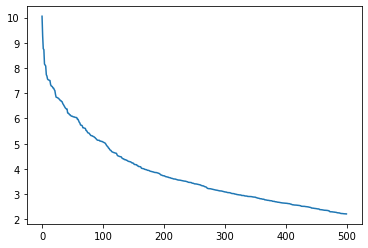

In [320]:
plt.plot(lst)

In [308]:
imagenewdata = np.array(imagedatanew)

In [309]:
imagenewdata.shape, labels.shape

((304, 500), (304,))

### Sklearn SVM

In [310]:
from sklearn import svm
svm_classifier = svm.SVC(kernel='linear', C=1.0)
svm_classifier.fit(imagenewdata, labels)
print(svm_classifier.score(imagenewdata, labels))

0.6710526315789473


### Sklearn Logistic Regression

In [243]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1500)
model.fit(image_data, labels)
print(model.score(image_data, labels))

0.6875


### Sklearn KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(image_data, labels)
knn.score(image_data, labels)

0.6348684210526315

### Visualise data

In [27]:
def drawImg(img) :
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

In [28]:
for i in range (10) :
    drawImg(image_data[i].reshape((32, 32, 3)))

ValueError: cannot reshape array of size 2700 into shape (32,32,3)

### SVM Classifier

In [ ]:
class SVM :
    
    def __init__(self, C=1) : # C is penalty for outliers
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self, W, b, X, Y) :
        loss = 0.0
        
        loss += .5 * np.dot(W, W.T)
        
        m = X.shape[0]
        
        for i in range(m) :
            ti = Y[i] * (np.dot(W, X[i].T) + b) # W->1 x n, X[i]->1 x n
            loss += self.C * max(0, (1 - ti))
            
        return loss[0][0]
    
    def fit(self, X, Y, batch_size=100, learning_rate=0.001, maxItr=500) :
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        # Initialise model parameters
        W = np.zeros((1, no_of_features))
        bias = 0
        
        # Initial loss
        # print(self.hingeLoss(W, bias, X, Y))
        
        # Training starts from here, update weight and bias
        losses = []
        
        for i in range(maxItr) :
            
            l = self.hingeLoss(W, bias, X, Y)
            losses.append(l)
            
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            # Batch Gradient Descent with random shuffling
            for batch_start in range(0, no_of_samples, batch_size) :
                # Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                # Iterate over all examples in mini batch
                for j in range(batch_start, batch_start + batch_size) :
                    if j < no_of_samples :
                        i = ids[j]
                        ti = Y[i] * (np.dot(W, X[i].T) + bias)
                        
                        if ti > 1 :
                            gradw += 0
                            gradb += 0
                        else :
                            gradw += c * Y[i] * X[i]
                            gradb += c * Y[i]
                    
                W = W - n * W + n * gradw
                bias = bias + n * gradb
                
        self.W = W
        self.b = bias
        return W, bias, losses

In [ ]:
image_data = image_data.reshape(m, -1)
print(image_data.shape, labels.shape)

In [ ]:
CLASSES = len(np.unique(labels))
print(CLASSES)

In [ ]:
def classWiseData(x, y) :
    data = {}
    for i in range(CLASSES) :
        data[i] = []
    
    for i in range(x.shape[0]) :
        data[y[i]].append(x[i])
        
    for k in data.keys() :
        data[k] = np.array(data[k])
    
    return data

In [ ]:
data = classWiseData(image_data, labels)

In [ ]:
print(data[0].shape[0])
print(data[1].shape[0])
print(data[2].shape[0])
print(data[0].shape)

In [ ]:
def getDataPairForSVM(d1, d2) :
    
    l1, l2 = d1.shape[0], d2.shape[0]
    
    samples = l1 + l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples, features))
    data_labels = np.zeros((samples, ))
    
    data_pair[:l1, :] = d1
    data_pair[l1:, :] = d2
    data_labels[:l1] = -1 # 0 for logistic regression
    data_labels[l1:] = +1
    
    return data_pair, data_labels

In [ ]:
mySVM = SVM()

In [ ]:
def trainSVMs(x, y) :
    svm_classifiers = {}
    
    for i in range(CLASSES) :
        svm_classifiers[i] = {}
        for j in range(i + 1, CLASSES) :
            xpair, ypair = getDataPairForSVM(data[i], data[j])
            wts, b, loss = mySVM.fit(xpair, ypair, learning_rate = 0.00001, maxItr=1500)
            svm_classifiers[i][j] = (wts, b)
            
    return svm_classifiers

In [ ]:
svm_classifiers = trainSVMs(image_data, labels)

In [ ]:
pika_bulba = svm_classifiers[0][1]
print(pika_bulba[0], pika_bulba[1])

In [ ]:
def binaryPredict(x, w, b) :
    z = np.dot(x, w.T) + b
    if z >= 0 :
        return 1
    else :
        return -1

In [ ]:
def predict(x) :
    count = np.zeros((CLASSES, ))
    
    for i in range(CLASSES) :
        for j in range(i + 1, CLASSES) :
            w, b = svm_classifiers[i][j]
            
            # Take majority prediction for each classifier
            z = binaryPredict(x, w, b)
            
            if z == 1 :
                count[j] += 1
            else :
                count[i] += 1
                
    final_prediction = np.argmax(count)
    return final_prediction

In [ ]:
print(predict(image_data[1]), labels[1])

In [ ]:
drawImg(image_data[1].reshape(32, 32, 3))

In [ ]:
def accuracy(x, y) :
    count = 0
    m = x.shape[0]
    
    for i in range(m) :
        prediction = predict(x[i])
        if prediction == y[i] :
            count += 1
    
    return count / m * 100

In [ ]:
print(accuracy(image_data, labels))

## Making predictions on test data

In [ ]:
testdata = pd.read_csv('./test/test.csv').values

In [ ]:
samples = testdata.shape[0]
print(samples)

In [ ]:
test_img = []

for i in range(samples) :
    img_path = './test/Images/' + testdata[i][0]
    img = image.load_img(img_path, target_size=(32,32))
    img_array = image.img_to_array(img)
    test_img.append(img_array)

In [ ]:
test_img[:3]

In [ ]:
test_img = np.array(test_img, dtype='float32')/255.0
test_img = test_img.reshape(samples, -1)
print(test_img.shape)

In [ ]:
reverse_dict = {
    0: 'Pikachu',
    1: 'Bulbasaur',
    2: 'Charmander'
}

In [ ]:
predictions = []

for i in range(samples) :
    pred = predict(test_img[i])
    predictions.append(reverse_dict[pred])

In [ ]:
len(predictions)

In [ ]:
for i in range(samples) :
    print(predictions[i])
    drawImg(test_img[i].reshape(32, 32, 3))

In [ ]:
predictions = np.array(predictions).reshape((-1, 1))
print(testdata.shape, predictions.shape)

In [ ]:
ans = np.hstack((testdata, predictions))

In [ ]:
ans

In [ ]:
ansdf = pd.DataFrame(ans, columns=['ImageId', 'NameOfPokemon'])

In [ ]:
ansdf.head()

In [ ]:
ansdf.to_csv('answerfeatsel.csv', index=False)